# Field Enhancement in Cylindrical Cavity
Axisymmetric electrostatics on a parallel-plate structure with a dielectric medium. There is a small cylindrical gas-filled cavity in the dielectric. This causes field enhancement inside the cavity, and is a configuration that occurs often in high-voltage technology.

## Configuration
The configuration consists of a parallel-plate structure with width $W$ and height $H$, with a cylindrical cavity of radius $r$, height $h$, and dielectric constant $\epsilon_c$ in the middle. This is modelled by making the configuration axisymmetric through the center of the cavity. A voltage of $U_0$ is applied between the electrodes to produce a background field $E_0 = \frac{U_0}{H}$.
![Configuration cylindrical cavity](figures/setup_cav_cylindrical.svg)

## Theory
Now, we want to simulate electrostatics in cylindrical coordinates including a variable relative permittivity. The Laplace equation is written
$$ \nabla \cdot \left[ \epsilon(r,z) \nabla V \right]  = 0 $$
The weak form of this differential equation is
$$ \int_\Omega \epsilon(r,z) \nabla u \cdot \nabla v \cdot r dr dz = \int_\Omega x \epsilon(x,y) \nabla u \cdot \nabla v d\Omega = 0$$

In [1]:
using LinearAlgebra

using Plots
using LaTeXStrings

using gmsh

using Gridap
using Gridap.Fields
using Gridap.Geometry
using GridapGmsh

# Create Geometry

In [2]:
W = 0.1;     # Width of the simulation domain [m]
H = 0.1;     # Height of the simulation domain [m]

r = 5e-3;    # Radius of cylinder [m]
h = 0.5e-3;  # Height of cylinder [m]

E0 = 1e5;    # Background field [V/m]
U0 = E0 * H; # Required voltage to create background field [V]

eps_r = 3.0; # Dielectric constant of the medium
eps_c = 1.0; # Dielectric constant of the cavity

In [3]:
gmsh.finalize()
gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
gmsh.model.add("fieldenh_cylinder")

c1 = W / 10;
c2 = maximum([r, h]) / 100;

# Points
gmsh.model.geo.addPoint(0, -H/2, 0, c1, 1)
gmsh.model.geo.addPoint(W, -H/2, 0, c1, 2)
gmsh.model.geo.addPoint(W, H/2, 0, c1, 3)
gmsh.model.geo.addPoint(0, H/2, 0, c1, 4)

gmsh.model.geo.addPoint(0, h/2, 0, c2, 5)
gmsh.model.geo.addPoint(0, -h/2, 0, c2, 6)
gmsh.model.geo.addPoint(r, -h/2, 0, c2, 7)
gmsh.model.geo.addPoint(r, h/2, 0, c2, 8)

# Lines
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(2, 3, 2)
gmsh.model.geo.addLine(3, 4, 3)
gmsh.model.geo.addLine(4, 5, 4)
gmsh.model.geo.addLine(5, 6, 5)
gmsh.model.geo.addLine(6, 1, 6)

gmsh.model.geo.addLine(6, 7, 7)
gmsh.model.geo.addLine(7, 8, 8)
gmsh.model.geo.addLine(8, 5, 9)

# Surfaces
gmsh.model.geo.addCurveLoop([1, 2, 3, 4, -9, -8, -7, 6], 1)
gmsh.model.geo.addCurveLoop([5, 7, 8, 9], 2)

gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.geo.addPlaneSurface([2], 2)

# Physics
gmsh.model.addPhysicalGroup(2, [1], 1)
gmsh.model.setPhysicalName(2, 1, "Dielectric")
gmsh.model.addPhysicalGroup(2, [2], 2)
gmsh.model.setPhysicalName(2, 2, "Cavity")

gmsh.model.addPhysicalGroup(1, [1], 1)
gmsh.model.setPhysicalName(1, 1, "D1")
gmsh.model.addPhysicalGroup(0, [1, 2], 1)
gmsh.model.setPhysicalName(0, 1, "D1p")

gmsh.model.addPhysicalGroup(1, [3], 2)
gmsh.model.setPhysicalName(1, 2, "D2")
gmsh.model.addPhysicalGroup(0, [3, 4], 2)
gmsh.model.setPhysicalName(0, 2, "D2p")

gmsh.model.addPhysicalGroup(1, [2, 4, 5, 6], 3)
gmsh.model.setPhysicalName(1, 3, "N1")

# Generate mesh and save
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)

gmsh.write("fieldenh_cylinder.msh")

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Line)
Info    : [ 60%] Meshing curve 6 (Line)
Info    : [ 70%] Meshing curve 7 (Line)
Info    : [ 80%] Meshing curve 8 (Line)
Info    : [ 90%] Meshing curve 9 (Line)
Info    : Done meshing 1D (Wall 0.00899982s, CPU 0.015625s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 50%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.102725s, CPU 0.09375s)
Info    : 2973 nodes 6162 elements
Info    : Writing 'fieldenh_cylinder.msh'...
Info    : Done writing 'fieldenh_cylinder.msh'


In [33]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.9.4
License       : GNU General Public License
Build OS      : Windows64-sdk
Build date    : 20220203
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration DomHex Eigen[contrib] Fltk Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] MathEx[contrib] Med Mesh Metis[contrib] Mmg Mpeg Netgen NoSocklenT ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.4.0
PETSc version : 3.15.0 (real arithmtic)
OCC version   : 7.6.0
MED version   : 4.1.0
Packaged by   : nt authority system
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------


# Gridap

In [4]:
# Load geometry from gmsh
model = GmshDiscreteModel("fieldenh_cylinder.msh")

# Create a reference finite element space to use for the construction of test space V0
#  The FE space is Lagrangian
order = 2
reffe = ReferenceFE(lagrangian, Float64, order);
# The test space is created from the reference FE with
#  conformity = H1: shape functions are continuous
#  D1 and D2 being the boundary points with Dirichlet condition applied
V0 = TestFESpace(model, reffe; conformity = :H1, dirichlet_tags = ["D1", "D1p", "D2", "D2p"]);

# Trial space is constructed from the test space
#  the [0, 1] indicates the values of the Dirichlet condition at D1 and D2
Ug = TrialFESpace(V0, [0, 0, U0, U0]);

# Triangulation of the domain
#  degree must be at least 2 times the order of the reference space
degree = 2 * order;
Ω = Triangulation(model);
dΩ = Measure(Ω, degree);

Info    : Reading 'fieldenh_cylinder.msh'...
Info    : 19 entities
Info    : 2973 nodes
Info    : 5948 elements
Info    : Done reading 'fieldenh_cylinder.msh'


In [6]:
labels = get_face_labeling(model)
dimension = num_cell_dims(model)
tags = get_face_tag(labels, dimension)

const tag_cavity = get_tag_from_name(labels, "Cavity")
const tag_diel = get_tag_from_name(labels, "Dielectric")

function eps(tag)
    if tag == tag_diel
        return eps_r;
    elseif tag == tag_cavity
        return eps_c;
    else
        return 1.0;
    end
end

τ = CellField(tags, Ω)

# Construct weak form (in cylindrical coordinates)
fun(x) = x[1];
lhs(u,v) = ∫( (eps∘τ) * ∇(u) ⋅ ∇(v) * fun )dΩ
rhs(v)   = 0;

# Construct FE operator with LHS, RHS, and test and trial spaces
op = AffineFEOperator(lhs, rhs, Ug, V0);

# Solve the linear FE system with LU solver
ls = LUSolver()
solver = LinearFESolver(ls)

uh = solve(solver, op);
E = ∇(uh);

# Plot Field

## Along $z$ axis
Along the $z$ axis we observe the effect of the normal boundary condition $\epsilon_1 E_{1n} = \epsilon_2 E_{2n}$.

In [7]:
y = Vector(-7.5e-3:1e-5:7.5e-3)
coord = [Point(0, y[i]) for i in 1:length(y)];
Eline = E(coord);
Eline = [sqrt(E[1]^2 + E[2]^2)  for E in Eline];

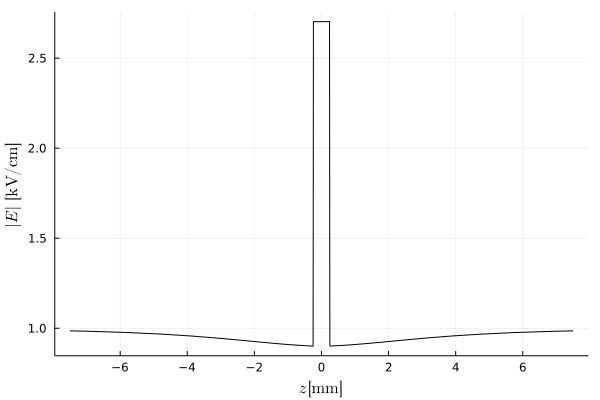

In [8]:
plot(y * 1e3, Eline * 1e-5, color = :black, legend = :false, xlabel = L"z\,\mathrm{[mm]}", ylabel = L"|E|\,\mathrm{[kV/cm]}")

## Field enhancement factor
Field enhancement inside the cavity

In [9]:
fmax = maximum(Eline) / E0

2.7033291896519107

## Along $r$ axis
Along the $r$ axis we observe the effect of the tangential boundary condition $E_{1t} = E_{2t}$.

In [10]:
x = Vector(0:1e-5:2.5*r)
coord = [Point(x[i], 0) for i in 1:length(x)];
Eline = E(coord);
Eline = [sqrt(E[1]^2 + E[2]^2)  for E in Eline];

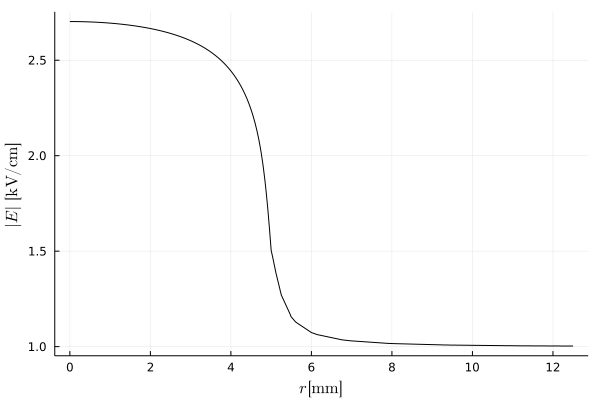

In [11]:
plot(x * 1e3, Eline * 1e-5, color = :black, legend = :false, xlabel = L"r\,\mathrm{[mm]}", ylabel = L"|E|\,\mathrm{[kV/cm]}")

# Export to VTK

In [15]:
writevtk(Ω,"fieldenh_cylinder", cellfields=["uh" => uh, "E" => E])

(["fieldenh_cylinder.vtu"],)

![ParaView](figures/fieldenh_cylinder.png)